In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [2]:
# Loading the housing price dataset (assuming the file name is "housing_price.csv")
df = pd.read_csv(r'C:\Users\Élio Vieira\Desktop\IronHack\Classes\Unit 5 - EDA and Inferencial Stats\LABS\Lab_1 EDA Univariate Analysis\lab-eda-univariate\amz_uk_price_prediction_dataset.csv')

In [29]:
df

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


In [9]:
#1.
category_frequency = df['category'].value_counts()
display(category_frequency)

top_categories = category_frequency.head(5)
display(top_categories)

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
                                           ...  
Alexa Built-In Devices                       107
Motorbike Chassis                            107
Plugs                                        107
Smart Home Security & Lighting               104
Smart Speakers                                54
Name: count, Length: 296, dtype: int64

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
Name: count, dtype: int64

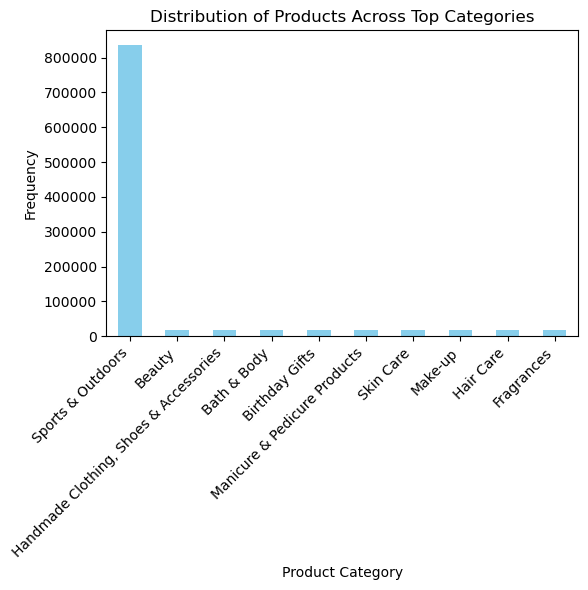

In [17]:
#2.
top_categories_subset = category_frequency.head(10)

plt.figure(figsize=(6, 6))
top_categories_subset.plot(kind='bar', color='skyblue')
plt.title('Distribution of Products Across Top Categories')
plt.xlabel('Product Category')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#yes, sports & outdoors

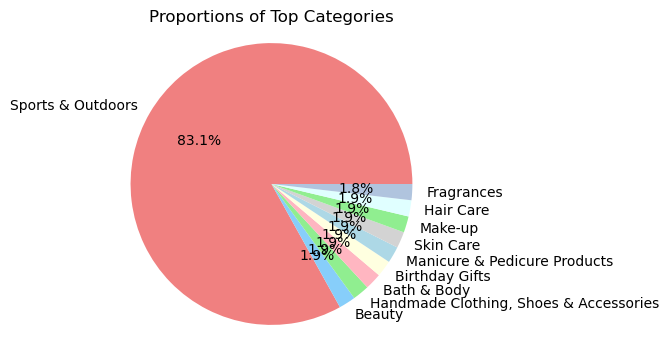

In [14]:
plt.figure(figsize=(4, 4))
top_categories_subset.plot(kind='pie', autopct='%1.1f%%', colors=['lightcoral', 'lightskyblue', 'lightgreen', 'lightpink', 'lightyellow', 'lightblue', 'lightgray', 'lightgreen', 'lightcyan', 'lightsteelblue'])
plt.title('Proportions of Top Categories')
plt.ylabel('')
plt.axis('equal')
plt.show()

In [22]:
#Part2 
#1.
mean_price = df['price'].mean()
median_price = df['price'].median()
mode_price = df['price'].mode()[0]

print(mean_price)
print(median_price)
print(mode_price)
# the average price is higher than the mode. 
#This shows that most prices are low, but then there are prices that break the scale and affect the average.

89.24380943923663
19.09
9.99


In [24]:
#2.
variance_price = df['price'].var()
std_dev_price = df['price'].std()
price_range = df['price'].max() - df['price'].min()
Q3, Q1 = df['price'].quantile([0.75, 0.25])
IQR = Q3 - Q1

In [25]:
print(variance_price)
print(std_dev_price)
print(price_range)
print(IQR)

119445.48532256528
345.60886175352226
100000.0
36.0


In [ ]:
#Overall, the relatively high variance and standard deviation, 
#as well as the large range, suggest a significant spread in product prices.

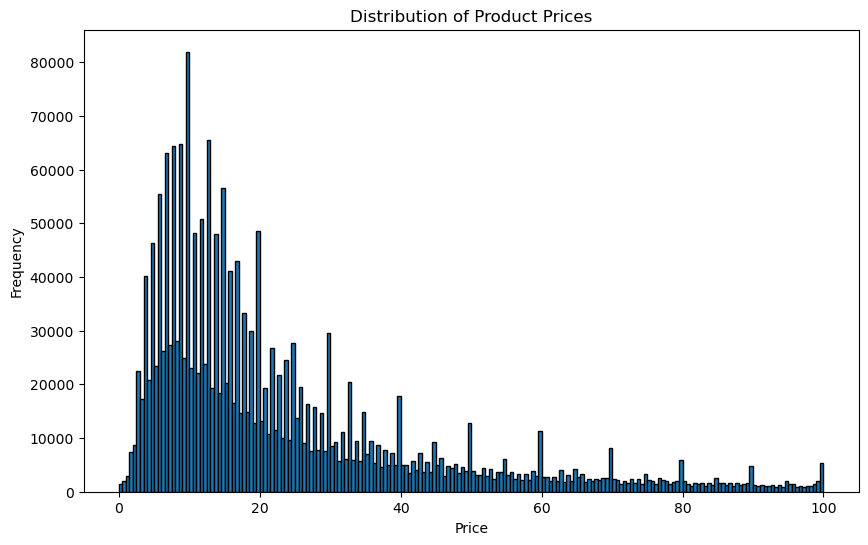

In [38]:
#3.
min_price = 0
max_price = 100

# Filter the dataset to include only prices within the specified range
filtered_prices = df[df['price'].between(min_price, max_price)]['price']

# Plot histogram with filtered prices
plt.figure(figsize=(10, 6))
plt.hist(filtered_prices, bins=200, edgecolor='black')
plt.title('Distribution of Product Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

In [ ]:
#yes, between 0 and 20

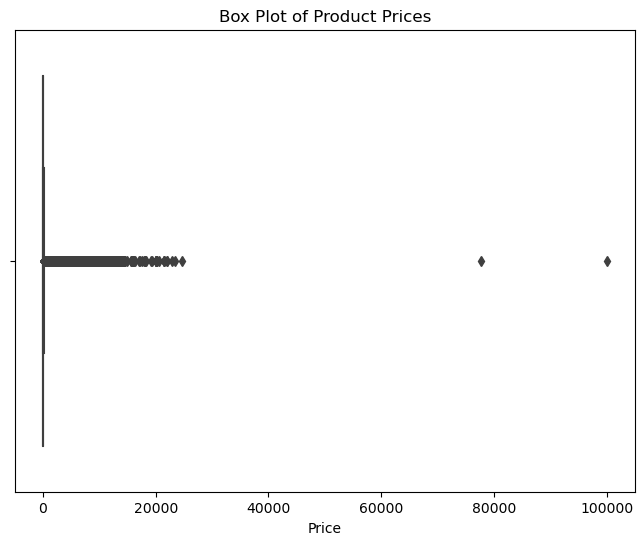

In [39]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['price'])
plt.title('Box Plot of Product Prices')
plt.xlabel('Price')
plt.show()

In [ ]:
#yes there are

In [43]:
#Part3
#1.
filtered_df = df[df['reviews'] != 0]

mean_rating = filtered_df['stars'].mean()
median_rating = filtered_df['stars'].median()
mode_rating = filtered_df['stars'].mode()[0]

print(mean_rating)
print(median_rating)
print(mode_rating)

4.31916076222691
4.4
4.5


In [ ]:
#generally do not rate, but of those who do, they usually rate in 4.5

In [45]:
#2.
variance_rating = filtered_df['stars'].var()
std_dev_rating = filtered_df['stars'].std()
Q3, Q1 = filtered_df['stars'].quantile([0.75, 0.25])
IQR = Q3 - Q1

print(variance_rating)
print(std_dev_rating)
print(IQR)

0.3083433752380519
0.5552867504614637
0.5


In [ ]:
#Overall, while the ratings are not perfectly consistent, there is a moderate level of variability in customer feedback.

In [48]:
#3.
from scipy.stats import skew, kurtosis

skewness_rating = skew(filtered_df['stars'])
kurtosis_rating = kurtosis(filtered_df['stars'])

print(skewness_rating)
print(kurtosis_rating)

-2.3795651817332506
9.781892609238655


In [ ]:
#skewed to the left, leans towards lower values
#distribution with heavier tails and a sharper peak

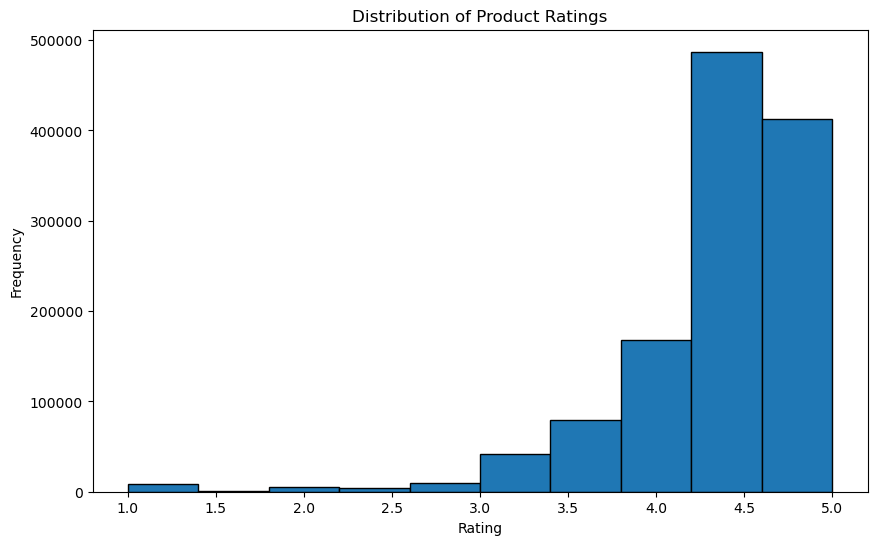

In [49]:
#4
plt.figure(figsize=(10, 6))
plt.hist(filtered_df['stars'], bins=10, edgecolor='black')
plt.title('Distribution of Product Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

In [ ]:
#yes, 4.5